<div dir="rtl" style="text-align: right;">
    
### **تمرین سری چهارم هوش مصنوعی**
### **بخش دوم: NEU Surface Defects**
### **محمدمهدی تویسرکانی**

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, SpatialDropout2D
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<div dir="rtl" style="text-align: right;">
    
### **1- آماده‌سازی داده‌ها**

In [3]:
def load_images_labels(data_dir, img_size=(64, 64)):
    images = []
    labels = []
    print(f"Loading from: {data_dir}")
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        print(f"Reading from: {class_path}")
        if not os.path.isdir(class_path):
            continue
        for img_file in os.listdir(class_path):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_path, img_file)
                try:
                    img = load_img(img_path, target_size=img_size)
                    img = img_to_array(img) / 255.0
                    images.append(img)
                    labels.append(class_name)
                except Exception as e:
                    print(f"Failed to load {img_path}: {e}")
    return np.array(images), np.array(labels)

train_img_dir = r"G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\train\images"
val_img_dir = r"G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\validation\images"

train_images, train_labels = load_images_labels(train_img_dir, img_size=(128, 128))
val_images, val_labels = load_images_labels(val_img_dir, img_size=(128, 128))

print("Loaded train samples:", len(train_images))
print("Loaded val samples:", len(val_images))

X = np.concatenate((train_images, val_images))
y = np.concatenate((train_labels, val_labels))

le = LabelEncoder()
y_encoded = to_categorical(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.15, random_state=42, stratify=y_encoded
)

print(f"Training shape: {X_train.shape}, {y_train.shape}")
print(f"Testing shape: {X_test.shape}, {y_test.shape}")

Loading from: G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\train\images
Reading from: G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\train\images\crazing
Reading from: G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\train\images\inclusion
Reading from: G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\train\images\patches
Reading from: G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\train\images\pitted_surface
Reading from: G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\train\images\rolled-in_scale
Reading from: G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\train\images\scratches
Loading from: G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\validation\images
Reading from: G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\validation\images\crazing
Reading from: G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\validation\images\inclusion
Reading from: G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\validation\images\patc

<div dir="rtl" style="text-align: right;">
    
### **2- طراحی شبکه MLP**

In [3]:
mlp_model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

mlp_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 256)               12583168  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
Total params: 12616838 (48.13 MB)
Trainable params: 12616838 (48.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<div dir="rtl" style="text-align: right;">
    
### **3- طراحی شبکه CNN**

In [4]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                      

<div dir="rtl" style="text-align: right;">
    
### **4- آموزش**

In [5]:
history_cnn = cnn_model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), batch_size=32)
history_mlp = mlp_model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/25
48/48 [==============================] - 65s 1s/step - loss: 3.5026 - accuracy: 0.7046 - val_loss: 25.5143 - val_accuracy: 0.1889
Epoch 2/25
48/48 [==============================] - 65s 1s/step - loss: 1.9875 - accuracy: 0.8111 - val_loss: 29.9988 - val_accuracy: 0.1704
Epoch 3/25
48/48 [==============================] - 65s 1s/step - loss: 1.5657 - accuracy: 0.8425 - val_loss: 29.9949 - val_accuracy: 0.1630
Epoch 4/25
48/48 [==============================] - 65s 1s/step - loss: 1.1393 - accuracy: 0.8706 - val_loss: 21.6733 - val_accuracy: 0.1667
Epoch 5/25
48/48 [==============================] - 66s 1s/step - loss: 1.0960 - accuracy: 0.8752 - val_loss: 21.4506 - val_accuracy: 0.2926
Epoch 6/25
48/48 [==============================] - 65s 1s/step - loss: 1.0390 - accuracy: 0.8882 - val_loss: 26.8674 - val_accuracy: 0.1852
Epoch 7/25
48/48 [==============================] - 64s 1s/step - loss: 0.7885 - accuracy: 0.9000 - val_loss: 20.6184 - val_accuracy: 0.1815
Epoch 8/25
48

<div dir="rtl" style="text-align: right;">
    
### **5- ارزیابی**

In [10]:
loss_cnn, acc_cnn = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {acc_cnn * 100:.2f}%")

loss_mlp, acc_mlp = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {acc_mlp * 100:.2f}%")

CNN Test Accuracy: 87.04%
MLP Test Accuracy: 32.96%


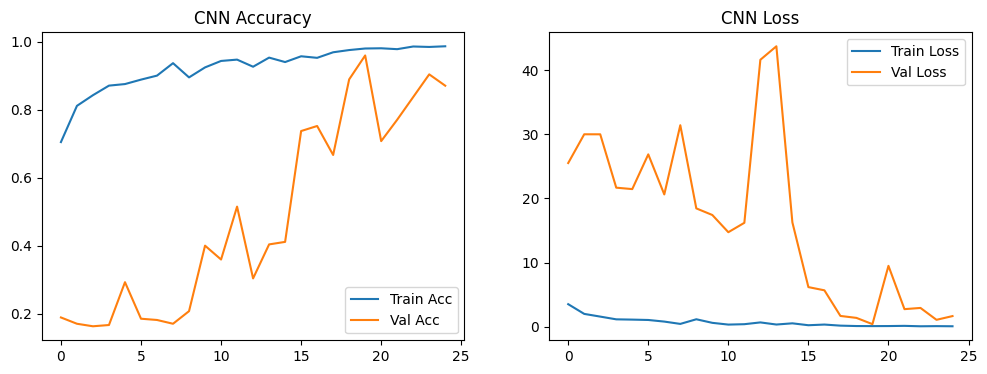

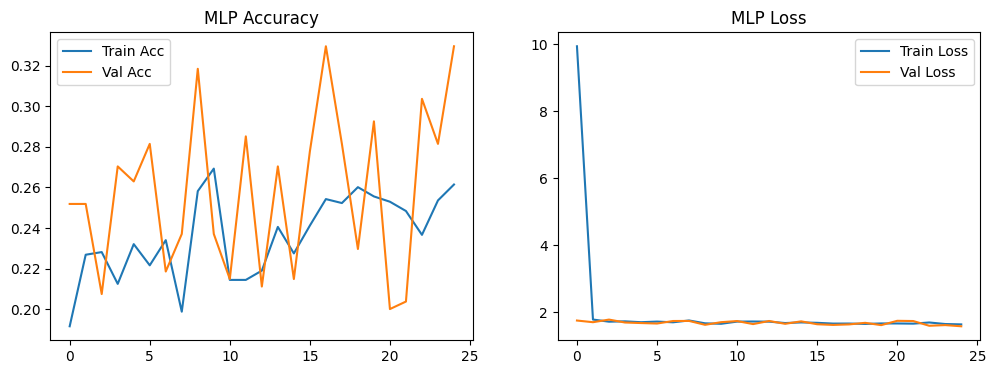

In [6]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

plot_history(history_cnn, "CNN")
plot_history(history_mlp, "MLP")

9/9 [==============================] - 3s 286ms/step


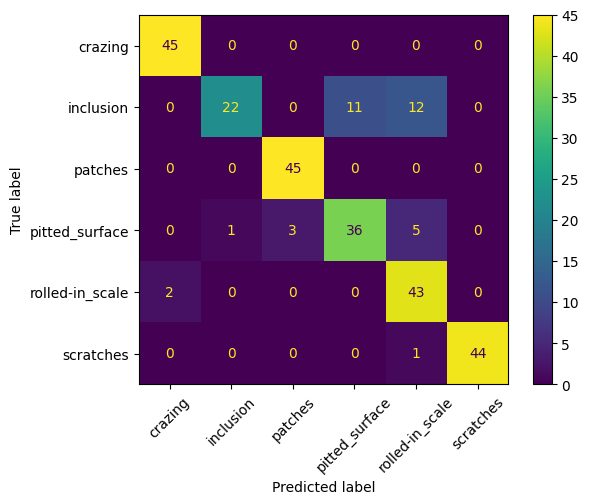

In [7]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45)
plt.show()

9/9 [==============================] - 0s 28ms/step


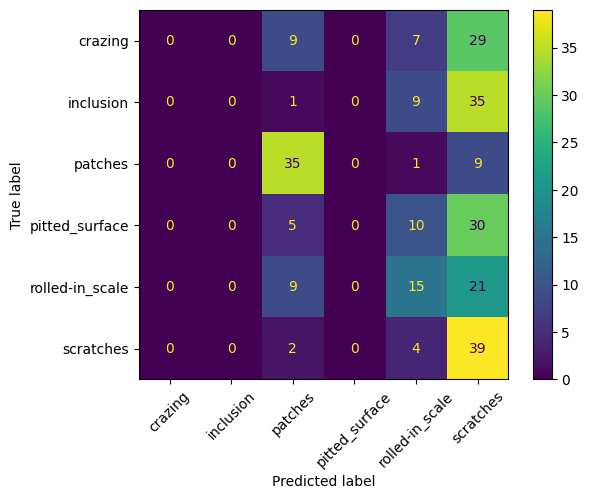

In [8]:
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45)
plt.show()

<div dir="rtl" style="text-align: right;">
    
### **6- تغییر هایپرپارامترها**

In [15]:
cnn_model_block = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    SpatialDropout2D(0.2),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    SpatialDropout2D(0.2),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

cnn_model_block.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model_block.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 spatial_dropout2d_2 (Spati  (None, 126, 126, 32)      0         
 alDropout2D)                                                    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                      

In [16]:
history_cnn_block = cnn_model_block.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/25
48/48 [==============================] - 49s 988ms/step - loss: 14.2619 - accuracy: 0.5980 - val_loss: 13.8735 - val_accuracy: 0.2593
Epoch 2/25
48/48 [==============================] - 51s 1s/step - loss: 8.8100 - accuracy: 0.7425 - val_loss: 31.0508 - val_accuracy: 0.3037
Epoch 3/25
48/48 [==============================] - 53s 1s/step - loss: 7.0073 - accuracy: 0.7608 - val_loss: 65.2325 - val_accuracy: 0.1667
Epoch 4/25
48/48 [==============================] - 55s 1s/step - loss: 3.2370 - accuracy: 0.8346 - val_loss: 78.2128 - val_accuracy: 0.1667
Epoch 5/25
48/48 [==============================] - 56s 1s/step - loss: 2.6915 - accuracy: 0.8601 - val_loss: 83.3628 - val_accuracy: 0.1667
Epoch 6/25
48/48 [==============================] - 56s 1s/step - loss: 1.9673 - accuracy: 0.8693 - val_loss: 86.0365 - val_accuracy: 0.1667
Epoch 7/25
48/48 [==============================] - 56s 1s/step - loss: 1.4849 - accuracy: 0.8706 - val_loss: 57.8384 - val_accuracy: 0.1963
Epoch 8/2

In [17]:
loss_cnn, acc_cnn = cnn_model_block.evaluate(X_test, y_test, verbose=0)
print(f"CNN_block Test Accuracy: {acc_cnn * 100:.2f}%")

CNN_block Test Accuracy: 86.30%


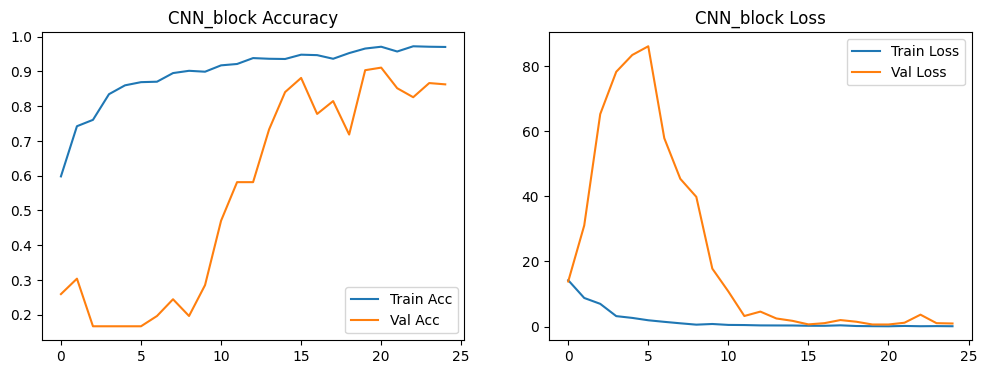

In [20]:
plot_history(history_cnn_block, "CNN_block")

9/9 [==============================] - 2s 207ms/step


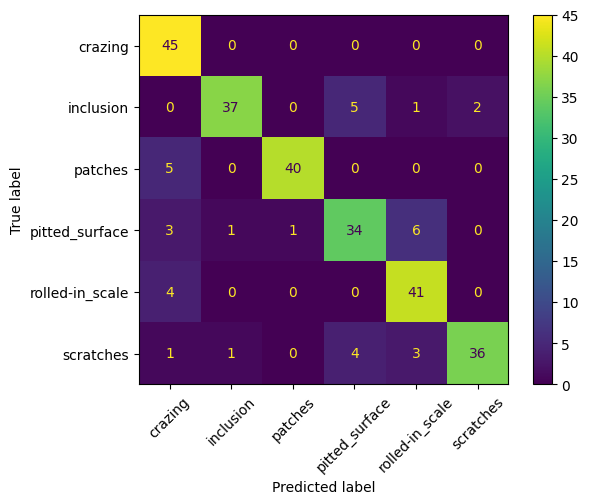

In [19]:
y_pred = np.argmax(cnn_model_block.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45)
plt.show()

In [21]:
cnn_factorized = Sequential([
    Conv2D(32, (1, 3), activation='relu', input_shape=(128, 128, 3)),
    Conv2D(32, (3, 1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (1, 3), activation='relu'),
    Conv2D(64, (3, 1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (1, 3), activation='relu'),
    Conv2D(128, (3, 1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

cnn_factorized.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_factorized.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 126, 32)      320       
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      3104      
                                                                 
 batch_normalization_7 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 63, 61, 64)        6208      
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)       

In [22]:
history_cnn_factorized = cnn_factorized.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/25
48/48 [==============================] - 80s 2s/step - loss: 2.9517 - accuracy: 0.7235 - val_loss: 16.3325 - val_accuracy: 0.1667
Epoch 2/25
48/48 [==============================] - 83s 2s/step - loss: 0.8851 - accuracy: 0.8699 - val_loss: 16.1606 - val_accuracy: 0.1704
Epoch 3/25
48/48 [==============================] - 85s 2s/step - loss: 0.5979 - accuracy: 0.9150 - val_loss: 27.7588 - val_accuracy: 0.1667
Epoch 4/25
48/48 [==============================] - 85s 2s/step - loss: 0.7967 - accuracy: 0.8850 - val_loss: 18.2684 - val_accuracy: 0.1519
Epoch 5/25
48/48 [==============================] - 86s 2s/step - loss: 0.4582 - accuracy: 0.9078 - val_loss: 21.5110 - val_accuracy: 0.2741
Epoch 6/25
48/48 [==============================] - 85s 2s/step - loss: 0.4368 - accuracy: 0.9242 - val_loss: 21.2934 - val_accuracy: 0.2259
Epoch 7/25
48/48 [==============================] - 88s 2s/step - loss: 0.5044 - accuracy: 0.9144 - val_loss: 11.2251 - val_accuracy: 0.2148
Epoch 8/25
48

In [23]:
loss_cnn, acc_cnn = cnn_factorized.evaluate(X_test, y_test, verbose=0)
print(f"CNN_factorized Test Accuracy: {acc_cnn * 100:.2f}%")

CNN_factorized Test Accuracy: 89.26%


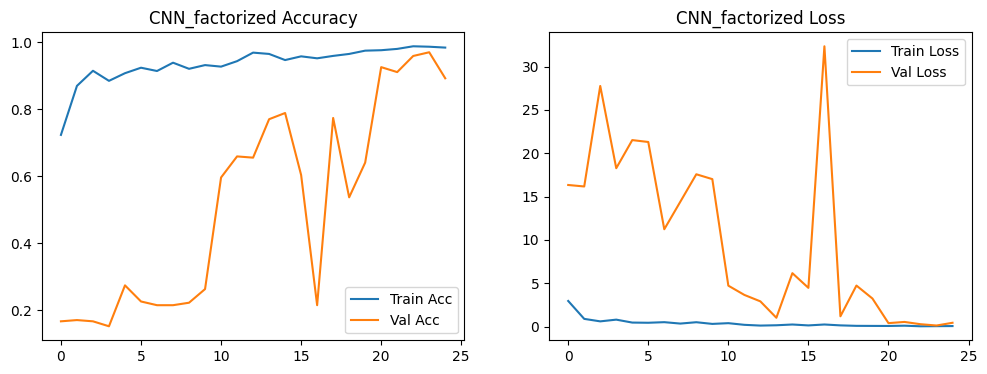

In [24]:
plot_history(history_cnn_factorized, "CNN_factorized")

9/9 [==============================] - 4s 375ms/step


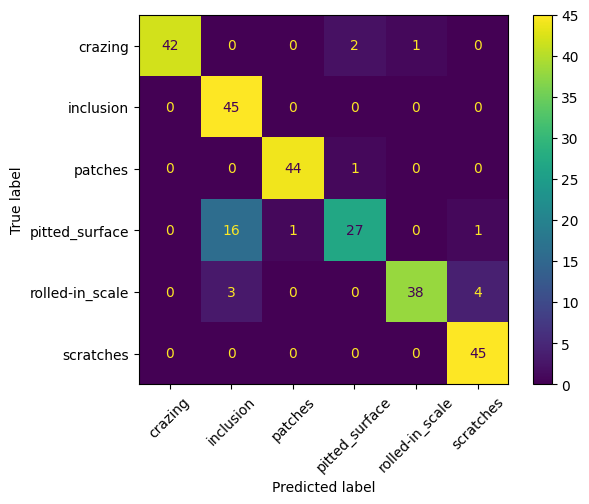

In [25]:
y_pred = np.argmax(cnn_factorized.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45)
plt.show()